### Шаг 1: загрузка данных и подготовка датасетов к анализу

In [1]:
# импортируем необходмые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from math import ceil
import plotly.graph_objects as go
import plotly.express as px
warnings.filterwarnings('ignore')
#pd.set_option('max_columns', None)
pd.options.display.float_format= '{:.3f}'.format
%config InlineBackend.figure_format = 'svg'

In [2]:
# загрузим датасеты 
#visits=pd.read_csv('/datasets/visits_log.csv', sep=',')
#orders=pd.read_csv('/datasets/orders_log.csv', sep=',')
#costs=pd.read_csv('/datasets/costs.csv', sep=',')
visits = pd.read_csv('visits_log.csv', sep=',')
orders = pd.read_csv('orders_log.csv', sep=',')
costs = pd.read_csv('costs.csv', sep=',')

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
#напишем функцию перевода столбцов к нижнему регистру и замены пробелов на "_" 
def replace_columns_names(data):
    list_of_columns = []
    for column in data.columns:
        column = column.lower()
        column = column.replace(' ', '_')
        list_of_columns.append(column)
    data.columns = list_of_columns
    return data

In [6]:
#изменим навзания столбцов
visits = replace_columns_names(visits)

In [7]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [8]:
visits['end_ts']=pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits['start_ts']=pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [9]:
visits.duplicated().sum()

0

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [11]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.000,10329302124590727494
1,2017-06-01 00:25:00,0.550,11627257723692907447
2,2017-06-01 00:27:00,0.370,17903680561304213844
3,2017-06-01 00:29:00,0.550,16109239769442553005
4,2017-06-01 07:58:00,0.370,14200605875248379450


In [12]:
#изменим названия столбцов
orders = replace_columns_names(orders)

In [13]:
# убедимся, что все получилось
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.000,10329302124590727494
1,2017-06-01 00:25:00,0.550,11627257723692907447
2,2017-06-01 00:27:00,0.370,17903680561304213844
3,2017-06-01 00:29:00,0.550,16109239769442553005
4,2017-06-01 07:58:00,0.370,14200605875248379450


In [14]:
# заменим тип данных на временной
orders['buy_ts']=pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')

In [15]:
orders.duplicated().sum()

0

In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [17]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.200
1,1,2017-06-02,62.250
2,1,2017-06-03,36.530
3,1,2017-06-04,55.000
4,1,2017-06-05,57.080


In [18]:
# заменим тип данных на временной
costs['dt']=pd.to_datetime(costs['dt'], format='%Y-%m-%d')

In [19]:
costs.duplicated().sum()

0

In [20]:
# проверим нет ли аномалий в датасете
visits.query('start_ts>end_ts')

,device,end_ts,source_id,start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


In [21]:
#удалим данную анномалию, поскольку их всего две
visits=visits.drop(index=4181)
visits=visits.drop(index=177972)

In [22]:
visits.query('start_ts>end_ts')

,device,end_ts,source_id,start_ts,uid


In [23]:
# проверим нет ли выручки с отрицательными значениями
orders.query('revenue<0')

,buy_ts,revenue,uid


#### Вывод:

Предобработка данных завершена: во всех трех таблицах нет пропусков и дупликатов; столбцы с временными данными сменили на тип данных datetime; названия столбцов пререведены в нижнйи регистр, пробелы заменены на нижний дефис. Датасеты готовы к дальнейшему анализу.

### Шаг 2: Рассчитайте метрики и постройте графики

#### Продукт: Сколько людей пользуются в день, неделю, месяц?

In [24]:
# найдем длительность визита в секундах, выделим в отдельный столбец неделю, месяц, год для посчета метрик
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_date'] = visits['start_ts'].dt.date
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['sesson_year'] = visits['start_ts'].astype('datetime64[Y]')

In [25]:
# посчитаем метрики 
dau = visits.groupby(['session_date']).agg({'uid':'nunique'}).mean()
wau = visits.groupby(['sesson_year', 'session_week']).agg({'uid':'nunique'}).mean()
mau = visits.groupby(['sesson_year', 'session_month']).agg({'uid':'nunique'}).mean()
print('В день сервисом в среднем пользуются {} людей'.format(int(dau)))
print('В неделю сервисом в среднем пользуются {} людей'.format(int(wau)))
print('В месяц сервисом в среднем пользуются {} людей'.format(int(mau)))

В день сервисом в среднем пользуются 907 людей
В неделю сервисом в среднем пользуются 5621 людей
В месяц сервисом в среднем пользуются 23228 людей


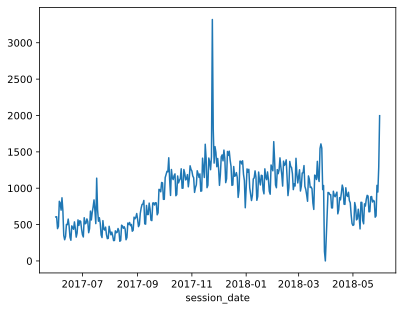

In [26]:
visits.groupby('session_date')['uid'].nunique().plot()
plt.show()

DAU - показатель дневной активности пользователей, посмотрим на график: видим, что пик дневной активности был в новогодние праздники, то есть в декабре 2017 - больше 3000, что неудивительно, Яндекс.Афиша пользовалась популярностью в один из главных праздников страны. Также можем увидеть на графике и спад пользователькой активности в апрельские дни 2018 года - показатель был практически нулевым. В мае 2018 показатель немного подрос - дневная активность была в раойне 2000.

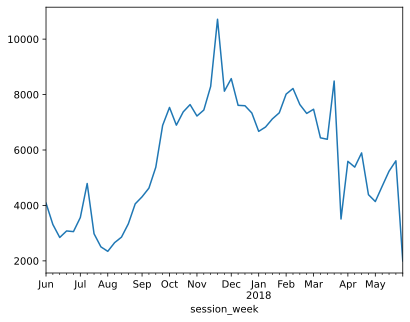

In [27]:
# отрисуем WAU - недельную активность пользователей 
visits.groupby('session_week')['uid'].nunique().plot()
plt.show()

График показывает нам недельную активность пользоваетелей, посещающих сайт\приложение. Самый сильный спад мы видим в районе 30 недели года (август), а пик недельной активности - в районе 50 недели (декабрь). Важно отслеживать пользовательсукую активность - это поможет решить оперативно проблемы с сайтом.

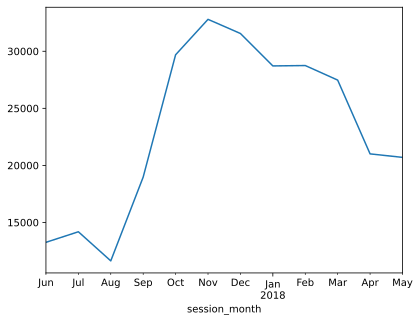

In [28]:
# теперь построим график месячной активности польтзователей
visits.groupby('session_month')['uid'].nunique().plot()
plt.show()

Посмотрим на график: спад активности в разрезе месячного анализа пришелся на август, а пик фиксируется в декабре, что подтверждает анализ дневной активности, как мы видели - пользователи активно пользовались приложением в предновогодние и новогодние дни.

In [29]:
# посчитаем недельную и месячную вовлеченность
sticky_wau = dau / wau
sticky_mau = dau / mau
print('Недельная вовлеченность аудитории: {:.2%}'.format(sticky_wau[0]))
print('Месячная вовлеченность аудитории: {:.2%}'.format(sticky_mau[0]))

Недельная вовлеченность аудитории: 16.15%
Месячная вовлеченность аудитории: 3.91%


#### Вывод:

В целом, показатели метрик показывают не очень хорошие цифры для такого раскрученного сайта как Яндекс.Афиша. Посмотрим на дальнейший анализ

#### Продукт: Сколько сессий в день?

In [30]:
visits.head()

,device,end_ts,source_id,start_ts,uid,duration,session_date,session_week,session_month,sesson_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017-12-20,2017-12-14,2017-12-01,2017-01-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018-02-19,2018-02-15,2018-02-01,2018-01-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017-07-01,2017-06-29,2017-07-01,2017-01-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018-05-20,2018-05-17,2018-05-01,2018-01-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017-12-27,2017-12-21,2017-12-01,2017-01-01


In [31]:
day_visits = visits.groupby(['session_date']).agg({'uid':'count'})
print('В день в среднем проходит {} сессий'.format(int(day_visits.mean()[0])))

В день в среднем проходит 987 сессий


#### Продукт: Сколько длится одна сессия?

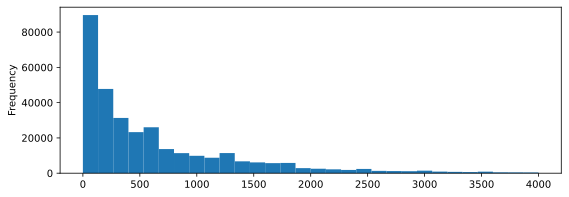

count   323604.000
mean       714.170
std       1026.349
min         19.000
25%        120.000
50%        360.000
75%        900.000
max      42660.000
Name: duration, dtype: float64
Одна сессия длится в среднем 60 секунд


In [32]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
mean_session = visits[visits['duration'] != '0 seconds']['duration'].mode()
durations_of_visits = visits[visits['duration'] != 0]['duration']
durations_of_visits.plot(kind = 'hist', bins = 30, figsize = (9,3), range = (0, 4000))
plt.show()
print(durations_of_visits.describe())
print('Одна сессия длится в среднем {} секунд'.format(mean_session[0]))

#### Вывод: 
60 секунд - достаточно маленькое время для нахождения на сайте, видимо пользователи ищут информацию по конкретным событиям, и сразу выходят. В чем же дело? Может быть ненаглядный интерфейс, может быть информационная наполняемость сайта недостаточная, у конкурентов лучше, быстрее, интереснее.. Посмотрим на другие показатели

#### Продукт: Как часто люди возвращаются?

In [33]:
sessions_per_user = len(visits) / len(visits['uid'].unique())
print('В среднем на одного пользователя приходится {:.2f} сессий \n'
      .format(sessions_per_user))

В среднем на одного пользователя приходится 1.58 сессий 



Данный показатель подтверждает то, что сервисом пользуются редко. Построим Retention Rate, чтобы посмотреть как часто возвращаются пользователи в рамках когорт.

In [34]:
# найдем первую активность пользователей
first_activity = visits.groupby('uid').agg({'start_ts':'min'})
first_activity.columns = ['first_activity']
visits = visits.join(first_activity, on='uid')

In [35]:
#создадим новый датафрейм с необходимыми данными
visits_rrate = visits[['uid', 'first_activity', 'start_ts']]
visits_rrate['first_activity_month'] = visits_rrate['first_activity'].astype('datetime64[M]')
visits_rrate['start_ts_month'] = visits_rrate['start_ts'].astype('datetime64[M]')
visits_rrate['lifetime'] = ((visits_rrate['start_ts_month'] - 
                             visits_rrate['first_activity_month']) / np.timedelta64(1, 'M')).round().astype('int')
visits_rrate.head()

,uid,first_activity,start_ts,first_activity_month,start_ts_month,lifetime
0,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,104060357244891740,2018-02-19 16:53:00,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,16174680259334210214,2018-03-09 20:05:00,2018-05-20 10:59:00,2018-03-01,2018-05-01,2
4,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


In [36]:
# сгруппируем данные первой активности и лайфтайм по уникальным пользователям
cohorts_visits = visits_rrate.groupby(['first_activity_month', 'lifetime']).agg({'uid':'nunique'}).reset_index()

In [37]:
# создадим новую переменную, отсортируем по нулевому лайфтайму
initial_users_count = cohorts_visits[cohorts_visits['lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count.columns = ['first_activity_month', 'cohort_users']
initial_users_count = initial_users_count.set_index('first_activity_month')

In [38]:
# убедимся, что все получилось
initial_users_count

,cohort_users
first_activity_month,
2017-06-01,13259
2017-07-01,13140
2017-08-01,10181
2017-09-01,16704
2017-10-01,25977
2017-11-01,27248
2017-12-01,25268
2018-01-01,22624
2018-02-01,22197


In [39]:
# присоединим к нашей таблице с когортами
cohorts_visits = cohorts_visits.join(initial_users_count, on = 'first_activity_month')

In [40]:
cohorts_visits

,first_activity_month,lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [41]:
# создадим финальный пивот и посчитаем Retention Rate
cohorts_visits['retention'] = cohorts_visits['uid'] / cohorts_visits['cohort_users']
retention_pivot = cohorts_visits.pivot_table(
    index='first_activity_month',
    columns='lifetime',
    values='retention',
    aggfunc='sum'
)
retention_pivot = retention_pivot.reset_index()
retention_pivot['first_activity_month'] = retention_pivot['first_activity_month'].dt.strftime('%Y-%m')
retention_pivot = retention_pivot.set_index('first_activity_month')
retention_pivot.loc['mean'] = retention_pivot.mean()
retention_pivot.fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06,1.000,0.079,0.054,0.061,0.069,0.071,0.061,0.058,0.052,0.051,0.041,0.045
2017-07,1.000,0.056,0.051,0.056,0.058,0.048,0.045,0.046,0.039,0.029,0.027,
2017-08,1.000,0.077,0.063,0.063,0.050,0.044,0.036,0.039,0.028,0.026,,
2017-09,1.000,0.085,0.069,0.051,0.039,0.038,0.036,0.024,0.023,,,
2017-10,1.000,0.079,0.052,0.039,0.034,0.032,0.021,0.020,,,,
2017-11,1.000,0.078,0.044,0.039,0.034,0.023,0.022,,,,,
2017-12,1.000,0.056,0.038,0.031,0.020,0.019,,,,,,
2018-01,1.000,0.060,0.039,0.025,0.020,,,,,,,
2018-02,1.000,0.057,0.025,0.020,,,,,,,,


In [42]:
# найдем средний Retention на второй месяц жизни когорт
cohorts_visits['retention'][1].mean()

0.07866354928727656

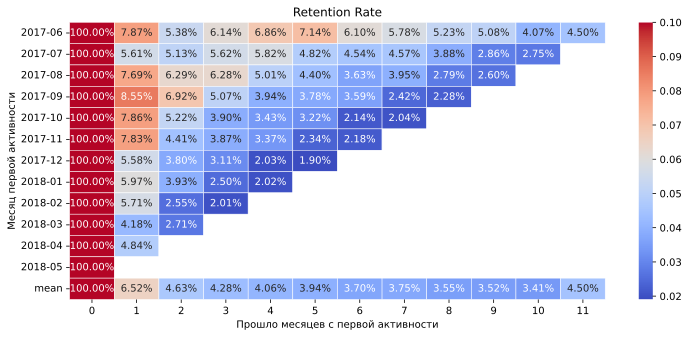

In [43]:
plt.figure(figsize=(12, 5))
plt.title('Retention Rate')
sns.heatmap(retention_pivot, annot=True, fmt=".2%", linewidths=.5, vmax=0.1, cmap= 'coolwarm')
plt.ylabel('Месяц первой активности')
plt.xlabel('Прошло месяцев с первой активности')
plt.show()

#### Вывод:

По графику тепловой карты видим, что пользователи редко возвращаются,  ни в одной когорте нет положительной динамики.

#### Продажи: Когда люди начинают покупать?

In [44]:
visits.head()

,device,end_ts,source_id,start_ts,uid,duration,session_date,session_week,session_month,sesson_year,first_activity
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017-12-20,2017-12-14,2017-12-01,2017-01-01,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018-02-19,2018-02-15,2018-02-01,2018-01-01,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017-07-01,2017-06-29,2017-07-01,2017-01-01,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018-05-20,2018-05-17,2018-05-01,2018-01-01,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017-12-27,2017-12-21,2017-12-01,2017-01-01,2017-12-27 14:06:00


In [45]:
#найдём время и дату первой сессии 
first_sessions = visits.groupby('uid').agg({'start_ts':'min'})
first_sessions.columns = ['first_session_start_ts']
first_sessions

,first_session_start_ts
uid,
11863502262781,2018-03-01 17:27:00
49537067089222,2018-02-06 15:55:00
297729379853735,2017-06-07 18:47:00
313578113262317,2017-09-18 22:49:00
325320750514679,2017-09-30 14:29:00
...,...
18446403737806311543,2017-11-30 03:36:00
18446424184725333426,2017-12-06 20:32:00
18446556406699109058,2018-01-01 16:29:00


In [46]:
# добавим столбцы даты и месяца для последующей группировки
first_sessions['first_session_date']=first_sessions['first_session_start_ts'].dt.date
first_sessions['first_session_month']=first_sessions['first_session_start_ts'].astype('datetime64[M]')
first_sessions

,first_session_start_ts,first_session_date,first_session_month
uid,,,
11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01
...,...,...,...
18446403737806311543,2017-11-30 03:36:00,2017-11-30,2017-11-01
18446424184725333426,2017-12-06 20:32:00,2017-12-06,2017-12-01
18446556406699109058,2018-01-01 16:29:00,2018-01-01,2018-01-01


In [47]:
#найдем день и месяц заказа, чтобы посчитать суммарную выручку за эти периоды
orders['buy_dt']=orders['buy_ts'].dt.date
orders['order_month']=orders['buy_ts'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,buy_dt,order_month
0,2017-06-01 00:10:00,17.000,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.550,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.370,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.550,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.370,14200605875248379450,2017-06-01,2017-06-01


In [48]:
#найдем время первой покупки
first_orders = orders.groupby(['uid']).agg({'buy_ts':'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders

,uid,first_order_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [49]:
first_orders['first_order_dt']=first_orders['first_order_ts'].dt.date
first_orders['first_order_month']=first_orders['first_order_ts'].astype('datetime64[M]')

In [50]:
#добавим дату и время первой сессии в информацию по первым заказам
buyers = pd.merge(first_sessions,first_orders, on='uid')
buyers

,uid,first_session_start_ts,first_session_date,first_session_month,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01
...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11-01
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01


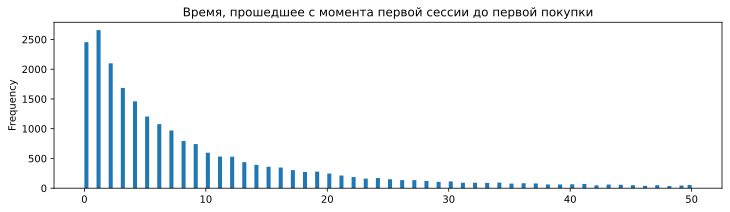

In [51]:
# найдем время, прошедшее с момента первой сессии до первой покупки
buyers['time_to_first_purchase'] = (buyers['first_order_ts']
                                          - buyers['first_session_start_ts']) / np.timedelta64(1, 'm')
buyers['time_to_first_purchase'].plot(
    kind = 'hist', bins = 150, 
    range = (0,50), figsize = (12,3), 
    title = 'Время, прошедшее с момента первой сессии до первой покупки')
plt.show()

In [52]:
print('Медиана времени с первой сессии до первой покупки: {} минут'.format(int(buyers['time_to_first_purchase'].median())))
print('Среднее время с первой сессии до первой покупки: {} дней'.format(int(buyers['time_to_first_purchase'].mean()/60/24)))
print('Мода времени с первой сессии до первой покупки: {} минута'.format(int(buyers['time_to_first_purchase'].mode())))

Медиана времени с первой сессии до первой покупки: 16 минут
Среднее время с первой сессии до первой покупки: 16 дней
Мода времени с первой сессии до первой покупки: 1 минута


#### Продажи: Сколько раз покупают за период?

Выполним когортный анализ.

In [53]:
buyers.head()

,uid,first_session_start_ts,first_session_date,first_session_month,first_order_ts,first_order_dt,first_order_month,time_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,154022.000
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0.000
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,79.000
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,1184.000
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0.000


In [54]:
# найдем число покупателей в каждой когорте
cohort_sizes=buyers.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.rename(columns={'uid':'n_buyers'}, inplace=True)
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [55]:
# добавим в информацию о покупках месяц первой покупки
cohorts=pd.merge(orders, buyers, how='inner', on='uid').groupby(['first_order_month', 'order_month'])\
.agg({'revenue':'count'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292


In [56]:
# посчитаем возраст каждой когорты
cohorts['age_month']=((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')).round()

In [57]:
cohorts.columns=['first_order_month', 'order_month', 'revenue', 'age_month']

In [58]:
# добавляем в когортный отчет количество покупателей в каждой когорте и считаем количество заказов на каждого покупателя
cohorts_report=pd.merge(cohort_sizes, cohorts, on='first_order_month')
cohorts_report['rev_per_buyer']=cohorts_report['revenue'] / cohorts_report['n_buyers']

In [59]:
cohorts_report.head()

,first_order_month,n_buyers,order_month,revenue,age_month,rev_per_buyer
0,2017-06-01,2023,2017-06-01,2354,0.000,1.164
1,2017-06-01,2023,2017-07-01,177,1.000,0.087
2,2017-06-01,2023,2017-08-01,174,2.000,0.086
3,2017-06-01,2023,2017-09-01,226,3.000,0.112
4,2017-06-01,2023,2017-10-01,292,4.000,0.144


In [60]:
# создадим сводную таблицу с когортным анализом, показывающим накопительное число покупок на покупателя
cohorts_age = cohorts_report.pivot_table(
    index = 'first_order_month', 
    columns = 'age_month', 
    values = 'rev_per_buyer', 
    aggfunc = 'sum'
).cumsum(axis=1)
#cohorts['mean'] = cohorts.mean(axis=1)

In [61]:
cohorts_age.round(2).fillna('')

age_month,0.000,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000
first_order_month,,,,,,,,,,,,
2017-06-01,1.160,1.250,1.340,1.450,1.590,1.700,1.840,1.920,2.030,2.100,2.150,2.190
2017-07-01,1.140,1.190,1.250,1.310,1.340,1.390,1.420,1.440,1.470,1.490,1.510,
2017-08-01,1.120,1.200,1.270,1.330,1.390,1.440,1.470,1.530,1.560,1.600,,
2017-09-01,1.140,1.220,1.280,1.350,1.370,1.420,1.460,1.480,1.500,,,
2017-10-01,1.140,1.220,1.250,1.280,1.310,1.340,1.350,1.380,,,,
2017-11-01,1.180,1.280,1.320,1.370,1.410,1.420,1.450,,,,,
2017-12-01,1.150,1.210,1.260,1.300,1.320,1.340,,,,,,
2018-01-01,1.120,1.190,1.240,1.250,1.280,,,,,,,
2018-02-01,1.120,1.180,1.210,1.220,,,,,,,,


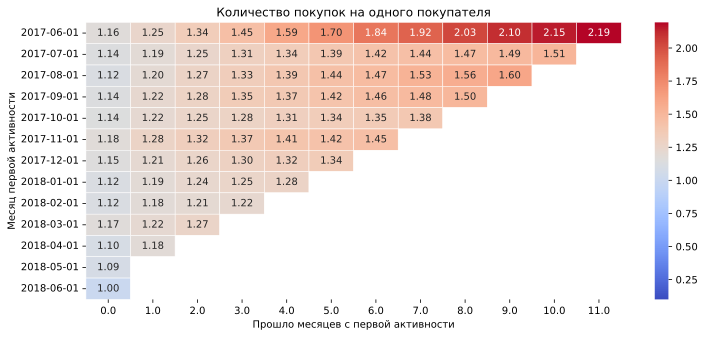

In [62]:
cohorts_age.index = [str(x)[0:10] for x in cohorts_age.index]
plt.figure(figsize=(12, 5))
plt.title('Количество покупок на одного покупателя')
sns.heatmap(cohorts_age, annot=True, fmt=".2f", linewidths=.5, vmin=0.1, cmap= 'coolwarm')
plt.xlabel('Прошло месяцев с первой активности')
plt.ylabel('Месяц первой активности')
plt.show()

In [63]:
# посчитаем среднее количество покупок на одного покупателя за 6 месяцев
round(cohorts_age[5].mean(), 2)

1.43

#### Вывод:

Только в первой когорте - 2017-06 - наблюдается заметный рост продаж, в остальных когортах наблюдается умеренный постепенный рост. Возможно, такой всплеск продаж можно объяснить успешной рекламной компанией.

#### Продажи: Какой средний чек?

In [64]:
orders.head()

,buy_ts,revenue,uid,buy_dt,order_month
0,2017-06-01 00:10:00,17.000,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.550,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.370,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.550,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.370,14200605875248379450,2017-06-01,2017-06-01


In [65]:
first_order_date_by_buyer=orders.groupby('uid')['buy_ts'].min()
first_order_date_by_buyer.name='first_buy_ts'
orders=orders.join(first_order_date_by_buyer, on='uid')
orders['first_buy_month']=orders['first_buy_ts'].astype('datetime64[M]')
orders['buy_month']=orders['buy_ts'].astype('datetime64[M]')
orders_grouped_by_cohorts=orders.groupby(
    ['first_buy_month', 'buy_month']
).agg({'revenue':'sum', 'uid':'nunique'})

In [66]:
orders_grouped_by_cohorts.head()

revenue   uid
first_buy_month buy_month                
2017-06-01      2017-06-01 9557.490  2023
                2017-07-01  981.820    61
                2017-08-01  885.340    50
                2017-09-01 1931.300    54
                2017-10-01 2068.580    88

In [67]:
orders_grouped_by_cohorts['rev_per_buyer']=(
    orders_grouped_by_cohorts['revenue']
    / orders_grouped_by_cohorts['uid']
)
orders_grouped_by_cohorts

revenue   uid  rev_per_buyer
first_buy_month buy_month                                
2017-06-01      2017-06-01  9557.490  2023          4.724
                2017-07-01   981.820    61         16.095
                2017-08-01   885.340    50         17.707
                2017-09-01  1931.300    54         35.765
                2017-10-01  2068.580    88         23.507
...                              ...   ...            ...
2018-03-01      2018-05-01  1114.870    58         19.222
2018-04-01      2018-04-01 10600.690  2276          4.658
                2018-05-01  1209.920    69         17.535
2018-05-01      2018-05-01 13925.760  2988          4.661
2018-06-01      2018-06-01     3.420     1          3.420

[79 rows x 3 columns]

In [68]:
print('Средний чек равен {:.2f}'.format(orders['revenue'].mean(), 2))

Средний чек равен 5.00


In [69]:
orders.head()

,buy_ts,revenue,uid,buy_dt,order_month,first_buy_ts,first_buy_month,buy_month
0,2017-06-01 00:10:00,17.000,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.550,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.370,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.550,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.370,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01


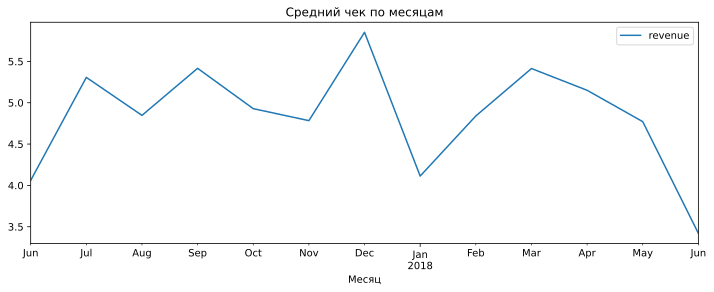

In [70]:
orders.pivot_table(
    index='buy_month',
    values='revenue',
    aggfunc='mean'
).plot(title='Средний чек по месяцам', figsize=(12, 4))
plt.xlabel('Месяц')
plt.show()

#### Продажи: Сколько денег приносят? (LTV)

In [71]:
orders.head()

,buy_ts,revenue,uid,buy_dt,order_month,first_buy_ts,first_buy_month,buy_month
0,2017-06-01 00:10:00,17.000,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.550,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.370,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.550,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.370,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [72]:
# найдем возраст когорты, сгруппируем данные по первому месяцу покупки и уникальному пользователю
orders['age_cohort'] = ((orders['buy_month'] - orders['first_buy_month']) / np.timedelta64(1, 'M')).round().astype('int')
cohort_sizes_ltv = orders.groupby('first_buy_month').agg({'uid':'nunique'})
cohort_sizes_ltv.columns = ['cohort_size']

In [73]:
orders_grouped_by_cohorts_ltv = orders.groupby(
    ['first_buy_month', 'age_cohort'])\
    .agg({'revenue':'sum', 'uid':'nunique'})\
    .reset_index()
orders_grouped_by_cohorts_ltv.head()

,first_buy_month,age_cohort,revenue,uid
0,2017-06-01,0,9557.490,2023
1,2017-06-01,1,981.820,61
2,2017-06-01,2,885.340,50
3,2017-06-01,3,1931.300,54
4,2017-06-01,4,2068.580,88


In [74]:
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.join(cohort_sizes_ltv, on='first_buy_month')

In [75]:
orders_grouped_by_cohorts_ltv['ltv'] = orders_grouped_by_cohorts_ltv['revenue'] / orders_grouped_by_cohorts_ltv['cohort_size']

In [76]:
# так как по условию маржинальность сервиса 100%, то просто разделим выручку на пользователя
orders_grouped_by_cohorts_ltv['revenue_per_user'] = orders_grouped_by_cohorts_ltv['revenue'] \
    / orders_grouped_by_cohorts_ltv['uid']

In [77]:
# создадим финальный пивот, посчитаем LTV
ltv = orders_grouped_by_cohorts_ltv.pivot_table(
    index = 'first_buy_month', 
    columns = 'age_cohort', 
    values = 'ltv', 
    aggfunc = 'mean'
)

In [78]:
ltv = ltv.cumsum(axis = 1)
ltv = ltv.reset_index()

In [79]:
ltv['first_buy_month'] = ltv['first_buy_month'].dt.strftime('%Y-%m')
ltv = ltv.set_index('first_buy_month')
ltv.loc['mean'] = ltv.mean()
ltv = ltv.round(2)
ltv.fillna('')

age_cohort,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06,4.720,5.210,5.650,6.600,7.620,8.360,9.310,9.890,10.450,11.050,11.620,11.880
2017-07,6.010,6.350,6.970,7.330,7.500,7.660,7.780,7.920,8.080,8.230,8.390,
2017-08,5.280,5.750,6.210,6.600,7.090,7.380,7.590,7.990,8.280,8.470,,
2017-09,5.640,6.760,7.280,11.260,11.660,12.310,13.010,13.250,13.440,,,
2017-10,5.000,5.540,5.730,5.890,6.040,6.160,6.240,6.360,,,,
2017-11,5.150,5.550,5.750,6.080,6.230,6.280,6.400,,,,,
2017-12,4.740,5.000,5.920,6.990,7.300,7.640,,,,,,
2018-01,4.140,4.430,4.730,4.880,4.940,,,,,,,
2018-02,4.160,4.440,4.510,4.590,,,,,,,,


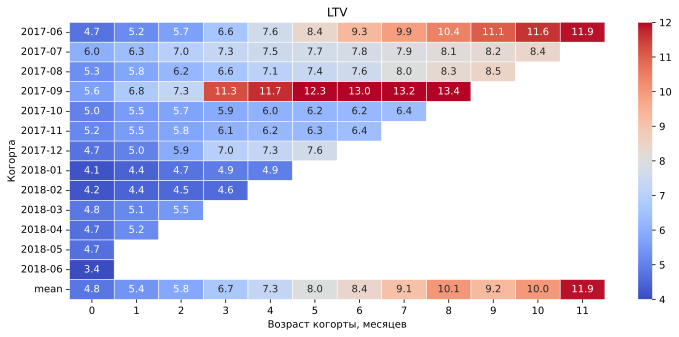

In [80]:
plt.figure(figsize=(12, 5))
plt.title('LTV')
sns.heatmap(ltv, annot=True, fmt=".1f", linewidths=.5, vmin=4, vmax=12, cmap = 'coolwarm')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

In [81]:
#m6_cum_ltv = ltv.cumsum(axis=1).mean(axis=0)[5]
#ltv[5].mean()
print('Средний LTV за 6 месяцев:', ltv[5].mean())

Средний LTV за 6 месяцев: 7.970000000000001


#### Вывод:

LTV во всех когортах возрастает в течение всех этапов жизни когорты, средний LTV за 6 месяцев на одного покупателя составляет 7,97.

#### Маркетинг: Сколько денег потратили? Всего / на каждый источник / по времени

In [82]:
costs['cost_month'] = costs['dt'].astype('datetime64[M]')
print('Всего потрачено на маркетинг {}'.format(costs['costs'].sum()))

Всего потрачено на маркетинг 329131.62


In [83]:
costs.groupby('source_id').sum()

,costs
source_id,
1,20833.270
2,42806.040
3,141321.630
4,61073.600
5,51757.100
9,5517.490
10,5822.490



Всего потрачено на каждый из источников


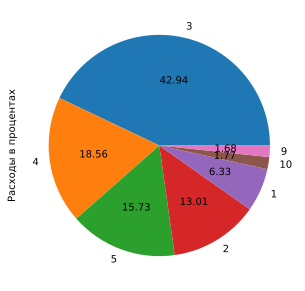

               costs
source_id           
1          20833.270
2          42806.040
3         141321.630
4          61073.600
5          51757.100
9           5517.490
10          5822.490


In [84]:
print('\nВсего потрачено на каждый из источников')
costs.groupby('source_id').sum().sort_values(by='costs', ascending=False).plot(
    y = 'costs', 
    autopct='%.2f', 
    kind = 'pie', 
    figsize = (5, 5), 
    legend = False
)
plt.ylabel('Расходы в процентах')
plt.show()
print(costs.groupby('source_id').sum())

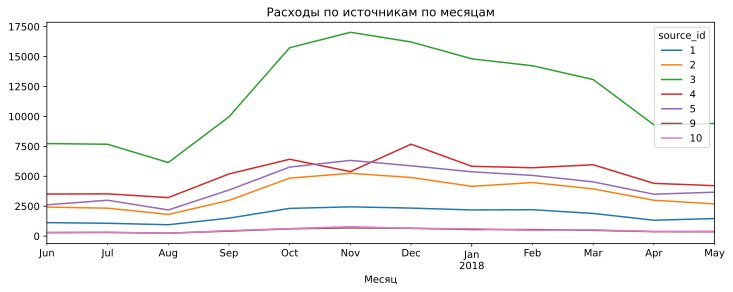

In [85]:
costs_pivot = costs.pivot_table(
    index = 'cost_month', 
    columns = 'source_id', 
    values = 'costs', 
    aggfunc = 'sum'
)
costs_pivot.plot(figsize = (12,4), title = 'Расходы по источникам по месяцам')
plt.xlabel('Месяц')
plt.show()

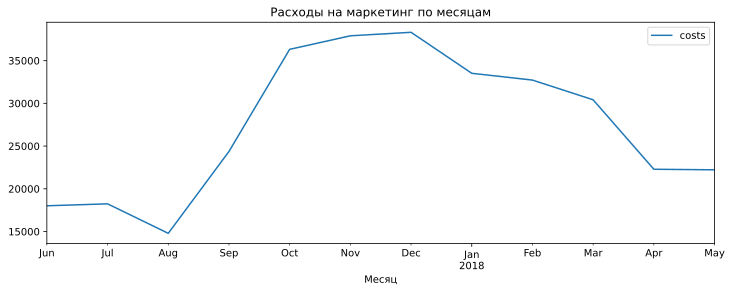

In [86]:
costs.pivot_table(
    index = 'cost_month', 
    values = 'costs', 
    aggfunc = 'sum'
).plot(title = 'Расходы на маркетинг по месяцам', figsize = (12,4))
plt.xlabel('Месяц')
plt.show()

#### Вывод:

Мы видим, что расходы на 3 рекламный источник самые высокие, составляют - 141 321.630. Самые дешевые источники - это 9 и 10, расходы по ним составляют - 5517.490 и 5822.490 соответственно. В целом расходы на маркетинг были самые низкие в августе 2018, а самые высокие - в декабре 2018 года.

#### Маркетинг: Сколько стоило привлечение одного покупателя из каждого источника?

In [87]:
visits.head()

,device,end_ts,source_id,start_ts,uid,duration,session_date,session_week,session_month,sesson_year,first_activity
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017-12-20,2017-12-14,2017-12-01,2017-01-01,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018-02-19,2018-02-15,2018-02-01,2018-01-01,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017-07-01,2017-06-29,2017-07-01,2017-01-01,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018-05-20,2018-05-17,2018-05-01,2018-01-01,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017-12-27,2017-12-21,2017-12-01,2017-01-01,2017-12-27 14:06:00


In [88]:
# найдем первый рекламный источник, из которого пришел каждый пользователь
users=visits.sort_values('start_ts').groupby('uid').first()
users=users[['source_id']]
buyers=pd.merge(buyers, users, left_on='uid', right_index=True)
buyers.head()

,uid,first_session_start_ts,first_session_date,first_session_month,first_order_ts,first_order_dt,first_order_month,time_to_first_purchase,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,154022.000,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0.000,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,79.000,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,1184.000,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0.000,5


In [89]:
buyers_daily=buyers.groupby(['source_id', 'first_order_dt']).agg({'uid':'count'}).reset_index()
buyers_daily.rename(columns={'uid':'n_buyers'}, inplace=True)
buyers_daily['first_order_dt']=pd.to_datetime(buyers_daily['first_order_dt'])
buyers_daily.head()

,source_id,first_order_dt,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [90]:
costs_=pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_['costs_per_buyer'] = costs_['costs'] / costs_['n_buyers']
costs_.head()

,source_id,first_order_dt,n_buyers,dt,costs,cost_month,costs_per_buyer
0,1,2017-06-01,14,2017-06-01,75.200,2017-06-01,5.371
1,1,2017-06-02,7,2017-06-02,62.250,2017-06-01,8.893
2,1,2017-06-03,7,2017-06-03,36.530,2017-06-01,5.219
3,1,2017-06-04,3,2017-06-04,55.000,2017-06-01,18.333
4,1,2017-06-05,18,2017-06-05,57.080,2017-06-01,3.171


In [91]:
costs_.pivot_table(
    index='cost_month',
    columns='source_id', 
    values='costs_per_buyer', 
    aggfunc='mean'
)

source_id,1,2,3,4,5,9,10
cost_month,,,,,,,
2017-06-01,11.681,12.884,16.717,10.792,9.210,5.254,4.590
2017-07-01,9.491,18.000,18.594,8.054,7.938,5.582,6.152
2017-08-01,12.119,18.886,19.795,11.555,6.880,4.900,5.813
2017-09-01,8.156,17.672,13.084,9.534,6.865,6.049,8.307
2017-10-01,8.202,14.193,14.613,6.234,6.306,5.923,6.363
2017-11-01,8.909,17.438,16.091,5.013,9.368,9.401,10.801
2017-12-01,8.570,13.871,12.948,5.657,8.399,7.899,7.803
2018-01-01,11.719,15.850,15.135,5.901,9.372,9.793,9.852
2018-02-01,10.752,18.209,13.895,5.428,7.725,8.181,4.490


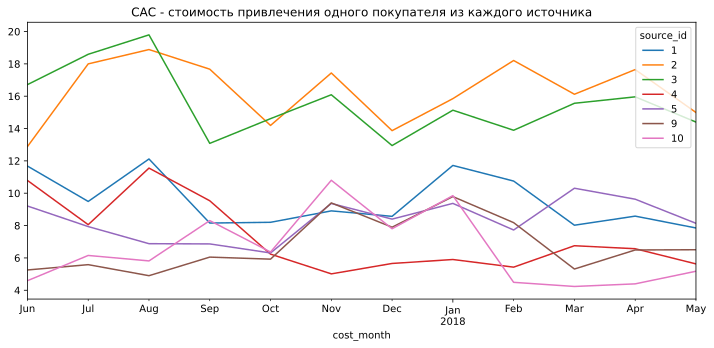

In [92]:
costs_.pivot_table(
    index='cost_month',
    columns='source_id', 
    values='costs_per_buyer', 
    aggfunc='mean'
).plot(
    figsize=(12, 5),
    title='САС - стоимость привлечения одного покупателя из каждого источника', 
#     xlabel='Месяц', 
#     set_ylabel='условные единицы'
)
plt.show()

In [93]:
# посчитаем и выведем средний САС по рекламным источникам
#mean_cac_by_source = costs_.groupby('source_id')['costs_per_buyer'].mean()
#mean_cac_by_source = costs_.groupby('source_id')['costs_per_buyer'].mean().to_frame().ignore_index=True
#print('\nСредний САС для рекламного источника:', source_id, ':' , mean_cac_by_source, '\n')

#### Вывод: 

По графику мы видим, что рекламный источники №2 и №3 - самые дорогие, источники 1, 9, 5, 10 - расходы по ним значительно ниже, маркетологам стоит обратить на них внимание. Также стоит отметить рекламный источник №4.

#### Маркетинг: На сколько окупились расходы? (ROI)

In [94]:
orders.head()

,buy_ts,revenue,uid,buy_dt,order_month,first_buy_ts,first_buy_month,buy_month,age_cohort
0,2017-06-01 00:10:00,17.000,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.550,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.370,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.550,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.370,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01,0


In [95]:
visits.head()

,device,end_ts,source_id,start_ts,uid,duration,session_date,session_week,session_month,sesson_year,first_activity
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017-12-20,2017-12-14,2017-12-01,2017-01-01,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018-02-19,2018-02-15,2018-02-01,2018-01-01,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017-07-01,2017-06-29,2017-07-01,2017-01-01,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018-05-20,2018-05-17,2018-05-01,2018-01-01,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017-12-27,2017-12-21,2017-12-01,2017-01-01,2017-12-27 14:06:00


In [96]:
#for source_id in [1, 2, 3, 4, 5, 9, 10]: 
 #   chosen_buyers=first_source_per_user.query('source_id == @source')
#chosen_buyers=first_source_per_user[first_source_per_user['source_id'] == source]

In [97]:
#visits_by_source=orders.merge(chosen_buyers, on='uid')
#mean_check=round(visits_by_source['revenue'].mean(), 2)

In [98]:
costs.head()

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.200,2017-06-01
1,1,2017-06-02,62.250,2017-06-01
2,1,2017-06-03,36.530,2017-06-01
3,1,2017-06-04,55.000,2017-06-01
4,1,2017-06-05,57.080,2017-06-01


In [99]:
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.set_index('first_buy_month')

In [100]:
costs_by_month = costs.pivot_table(index = 'cost_month', values = 'costs', aggfunc = 'sum').reset_index()
costs_by_month.columns = ['first_buy_month', 'costs']
costs_by_month = costs_by_month.set_index('first_buy_month')

In [101]:
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.join(costs_by_month, on = 'first_buy_month')

In [102]:
orders_grouped_by_cohorts_ltv['cac'] = orders_grouped_by_cohorts_ltv['costs'] / orders_grouped_by_cohorts_ltv['cohort_size']
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv[:-1]
orders_grouped_by_cohorts_ltv['romi'] = orders_grouped_by_cohorts_ltv['ltv'] / orders_grouped_by_cohorts_ltv['cac']
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.reset_index()

In [103]:
romi = orders_grouped_by_cohorts_ltv.pivot_table(
    index = 'first_buy_month', 
    columns = 'age_cohort', 
    values = 'romi', 
    aggfunc = 'mean'
)

In [104]:
romi = romi.cumsum(axis=1)
romi = romi.reset_index()
romi['first_buy_month'] = romi['first_buy_month'].dt.strftime('%Y-%m')
romi = romi.set_index('first_buy_month')
romi.loc['mean'] = romi.mean()
romi = romi.round(2)

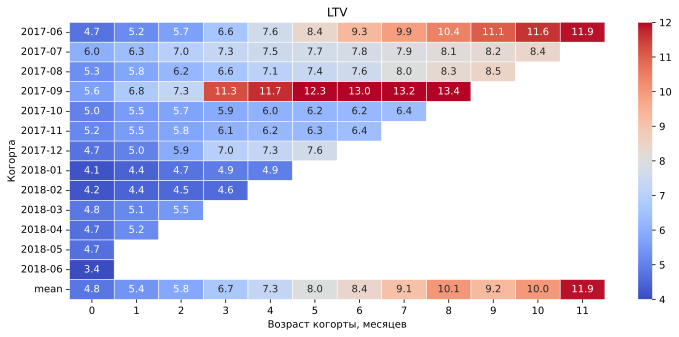

In [105]:
plt.figure(figsize=(12, 5))
plt.title('LTV')
sns.heatmap(ltv, annot=True, fmt=".1f", linewidths=.5, vmin=4, vmax=12, cmap = 'coolwarm')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

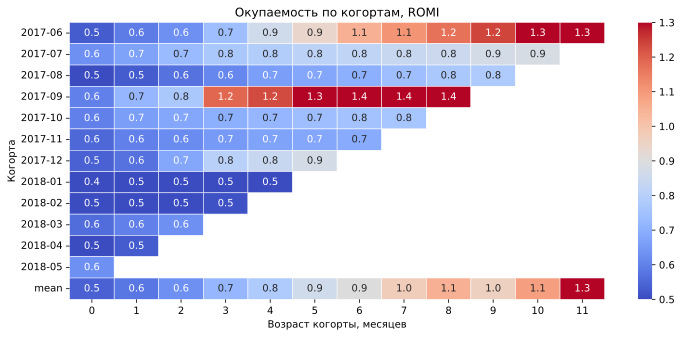

In [106]:
plt.figure(figsize=(12, 5))
plt.title('Окупаемость по когортам, ROMI')
sns.heatmap(romi, annot=True, fmt=".1f", linewidths=.5, vmin=.5, vmax=1.3, cmap = 'coolwarm')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

In [107]:
ltv = orders_grouped_by_cohorts_ltv.pivot_table(
    index = 'first_buy_month', 
    columns = 'age_cohort', 
    values = 'ltv', 
    aggfunc = 'mean'
)
ltv = ltv.cumsum(axis = 1)
ltv = ltv.reset_index()
ltv['first_buy_month'] = ltv['first_buy_month'].dt.strftime('%Y-%m')
ltv = ltv.set_index('first_buy_month')
ltv.loc['mean'] = ltv.mean()
ltv = ltv.round(2)
ltv.fillna('')

age_cohort,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06,4.720,5.210,5.650,6.600,7.620,8.360,9.310,9.890,10.450,11.050,11.620,11.880
2017-07,6.010,6.350,6.970,7.330,7.500,7.660,7.780,7.920,8.080,8.230,8.390,
2017-08,5.280,5.750,6.210,6.600,7.090,7.380,7.590,7.990,8.280,8.470,,
2017-09,5.640,6.760,7.280,11.260,11.660,12.310,13.010,13.250,13.440,,,
2017-10,5.000,5.540,5.730,5.890,6.040,6.160,6.240,6.360,,,,
2017-11,5.150,5.550,5.750,6.080,6.230,6.280,6.400,,,,,
2017-12,4.740,5.000,5.920,6.990,7.300,7.640,,,,,,
2018-01,4.140,4.430,4.730,4.880,4.940,,,,,,,
2018-02,4.160,4.440,4.510,4.590,,,,,,,,


#### Вывод:

Затраты окупились лишь в двух когортах: 2017-06 и 2017-09 на 3 и 6 месяцы жизни когорт соответственно, остальные когорты вообще не окупились. 


Средний ROMI за 6 месяцев после первой покупки по источнику: 1 :  1.96 


Средний ROMI за 6 месяцев после первой покупки по источнику: 2 :  2.03 


Средний ROMI за 6 месяцев после первой покупки по источнику: 3 :  0.33 


Средний ROMI за 6 месяцев после первой покупки по источнику: 4 :  0.85 


Средний ROMI за 6 месяцев после первой покупки по источнику: 5 :  0.92 


Средний ROMI за 6 месяцев после первой покупки по источнику: 9 :  1.66 


Средний ROMI за 6 месяцев после первой покупки по источнику: 10 :  0.51 



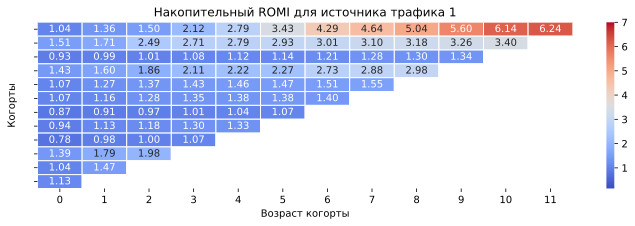

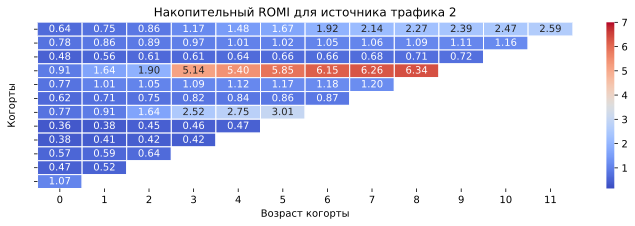

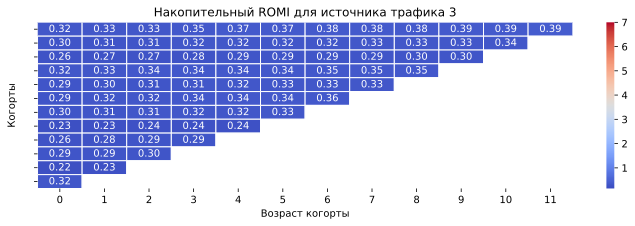

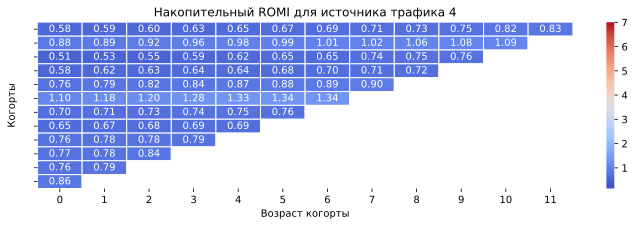

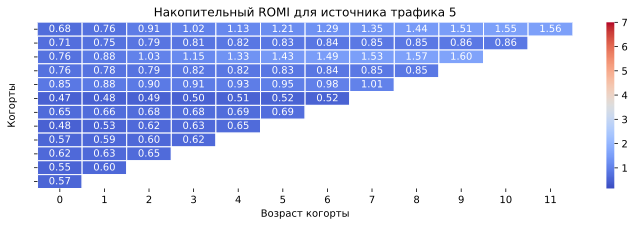

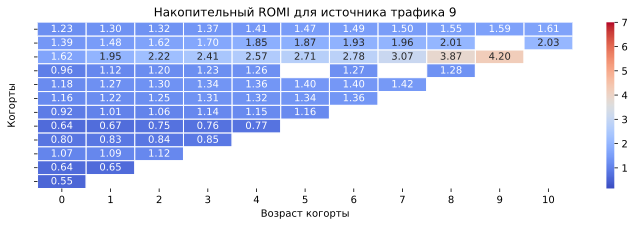

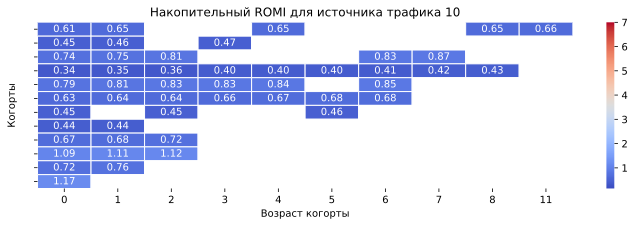

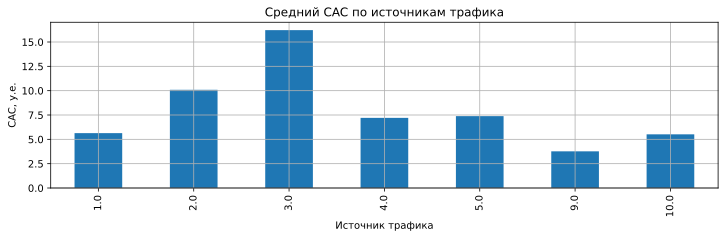

In [108]:
margin_rate = 1
#Расчет первого источника трафика
first_source_id = visits.groupby('uid').agg({'source_id': 'first'})
orders = orders.merge(first_source_id, on='uid')
orders = orders.rename(columns={'source_id': 'first_source_id'})
 
#Расчет LTV, CAC, ROMI по источникам    
 
cac_by_source = pd.DataFrame()
 
for source_id in [ 1,  2,  3,  4,  5,  9,  10]: 
 
    orders_by_source = orders.query('first_source_id == @source_id')
    
    #Получение месяца первой покупки каждого покупателя
    first_orders_by_source = orders_by_source.groupby('uid').agg({'order_month': 'min'}).reset_index()
    first_orders_by_source.columns = ['uid', 'first_order_month']
 
    #Расчет количества новых покупателей (n_buyers) за каждый месяц
    cohort_sizes_by_source = first_orders_by_source.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes_by_source.columns = ['first_order_month', 'n_buyers']
 
    #Добавление месяца первого заказа в датафрейм к покупкам
    orders_first_month_by_source = orders_by_source.merge(first_orders_by_source, on='uid') 
 
    #Группировка зазазов в когорты
    cohorts_by_source = orders_first_month_by_source.groupby(['first_order_month', 'order_month'])\
    .agg({'revenue': 'sum'}).reset_index()
 
 
    #Добавление в таблицу когорт данные о том, сколько людей первый раз совершили покупку в каждый месяц
    report_by_source = cohort_sizes_by_source.merge(cohorts_by_source, on='first_order_month')
 
    #Расчет валовой прибыли
    report_by_source['gp'] =  report_by_source['revenue'] * margin_rate
 
    #Расчет возраста когорт в месяцах
    report_by_source['age'] = (report_by_source['order_month'] - report_by_source['first_order_month'])\
    / np.timedelta64(1, 'M')
    report_by_source['age'] = report_by_source['age'].round().astype('int')
 
    #Расчет LTV когорт
    report_by_source['ltv'] = report_by_source['gp'] / report_by_source['n_buyers']
 
    #Расчет CAC и ROMI
    costs_by_source = costs.query('source_id == @source_id')
    monthly_costs_by_source = costs_by_source.groupby('cost_month')['costs'].sum()
    report_new_by_source = pd.merge(
    report_by_source, monthly_costs_by_source, left_on='first_order_month', right_on='cost_month')
 
    report_new_by_source['cac'] = report_new_by_source['costs'] / report_new_by_source['n_buyers']
    report_new_by_source['romi'] = report_new_by_source['ltv'] / report_new_by_source['cac']
 
    #Вывод среднего CAC
    cac_by_source = cac_by_source.append({'source_id': source_id,'cac': report_new_by_source['cac'].mean()},\
                                         ignore_index=True)
 
    #Вывод накопительного ROMI
    output = report_new_by_source.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean').cumsum(axis=1)
    output.index= [str(x)[10] for x in output.index]
    plt.figure(figsize = (12, 3))
    ax = sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, vmin = .15, vmax = 7, cmap='coolwarm')    
    ax.set_yticklabels(output.index)
    ax.set_title('Накопительный ROMI для источника трафика ' + str(source_id), fontsize = 12)
    ax.set_xlabel('Возраст когорты')
    ax.set_ylabel('Когорты')
 
    #расчет среднего ROMI по когортам за 6 месяцев
    m6_cum_romi = output.mean(axis=0)[5]
    print('\nСредний ROMI за 6 месяцев после первой покупки по источнику:', source_id, ': ' , m6_cum_romi.round(2), '\n')
 
cac_by_source.plot(x = 'source_id', y = 'cac', grid = True, figsize = (12, 3), linewidth=3, kind = 'bar', legend = False);
plt.title('Средний CAC по источникам трафика', fontsize = 12)
plt.ylabel('CAC, у.е.')
plt.xlabel('Источник трафика')
plt.show()

In [109]:
cac_by_source

,source_id,cac
0,1.000,5.636
1,2.000,10.091
2,3.000,16.218
3,4.000,7.204
4,5.000,7.388
5,9.000,3.770
6,10.000,5.514


#### Вывод:

Показатели ROMI показывают неутешительные результаты: проект Яндекс.Афиша не приносит прибыли за данный отрезок времени, поскольку стоимость привлечения - показатель САС - дороже (выше), чем окупаемость, то есть деньги с каждого покупателя. Посмотрим подробнее по когортам в разрезе источников: можно сказать, что окупились только когорта 2017-09-01 в рекламном истонике №2, и еще когорта 2017-07-01 в рекламном источнике №4. Остальные,  к сожалению, не показали прибыли.

### Общий вывод по проекту: 

Несмотря на известность Яндекс.Афиши, люди редко пользуются сервисом, покупают в первое посещение, Retention в когортах снижается на протяжении всего лайфтайма - очевидно, что пользователи заходят и делают запланированную покупку и больше не возращаются; 60 секунд - наиболее частое время посещения, средний чек 5 условных единиц.
Подведем общий итог по окупаемости реклмных источников: сначала посмотрим какие окупились - это источники №1 и №9: САС 5,636 и 3,770 соответственно - самые низкие показатели, при среднем LTV 7.97, а показатели ROMI 1,96 и 1,66 соответственно. 
Самые убыточный канал рекламы - это источник №3: самый высокий САС 16,128 и самый низкий ROMI 0,33, при этом рекламный бюджет у него самый высокий 141321,63 - надежды маркетологов совершенно не оправдались. Также убыточным оказался рекламный источник № 10: САС 5,514 - существенно ниже LTV, но при этом ROMI 0,51. Оба источнка оказадись ниже точки безубыточнности.
Посмотрим на показатели источника №2: САС 10,091 - намного выше среднего LTV, но при этом ROMI превышает 200% - 2,03, затраты на канал составили 42806,04, отметим в этом канале когорту 2017-09 - показывает хорошую окупаемость при анализе общего ROMI по когортам, также общий LTV - показывает самые лучшие показатели среди всех когорт. Возможно, из-за этой когорты у источника №2 такой высокий ROMI.
Теперь посмотрим на рекламные источники №4 и №5: САС 7,204 и 7,388 соответственно - приближается к показателю LTV. ROMI 0,85 и 0,92 соответственно, что говорит нам, что скорее всего каналы окупаются, затраты на их бюджет составили 61073,6 и 51757,1 соответственно, посмотрим на окупаемость когорт в этих каналах: все когорты имеют положительныю динамику, это хороший знак.
Я думаю, что рекламные каналы 4 и 5 - самые перспективные для увеличения бюджета. Маркетологам стоит обратить внимание ни них. Возможно, если рекламный бюджет канала 3 перераспределить на источники 4 и 5 - они покажут хорошие показатели ROMI в следующем периоде. Что касается когорт, то отличный результат показала когорта 2017-06, показатели Retention, LTV и ROMI говорят нам об этом, ее постоянство следует проанализировать маркетологам, также стоит отметить когорту 2017-09 - показатели LTV и ROMI высокие, Retention низкий (упал почти в 2 раза в конце лайфтайма) - на этот момент маркетологам также необходимо обратить внимание, почему покупатели не возвращаются.